<a href="https://colab.research.google.com/github/bertagrim/fastai_practice/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 47.8 MB/s 
     |████████████████████████████████| 1.2 MB 41.1 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 51 kB 279 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
import os

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '790457b900834ef8889350cfe0d5c681')

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
results = search_images_bing(key, 'harpy eagle')
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
ims=['https://upload.wikimedia.org/wikipedia/commons/3/3b/Harpia_harpyja_001_800.jpg']

In [ ]:
dest = 'images/harpy.jpg'
download_url(ims[0], dest)

Path('images/harpy.jpg')

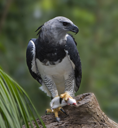

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
eagle_types = 'philippine','harpy','bald'
path = Path('eagles')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in eagle_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} eagle')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#440) [Path('eagles/harpy/00000014.jpg'),Path('eagles/harpy/00000081.jpg'),Path('eagles/harpy/00000037.jpg'),Path('eagles/harpy/00000083.jpg'),Path('eagles/harpy/00000090.jpg'),Path('eagles/harpy/00000036.jpg'),Path('eagles/harpy/00000056.jpg'),Path('eagles/harpy/00000024.jpg'),Path('eagles/harpy/00000148.jpg'),Path('eagles/harpy/00000033.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#1) [Path('eagles/philippine/00000117.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
eagles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = eagles.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=8, nrows=1)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


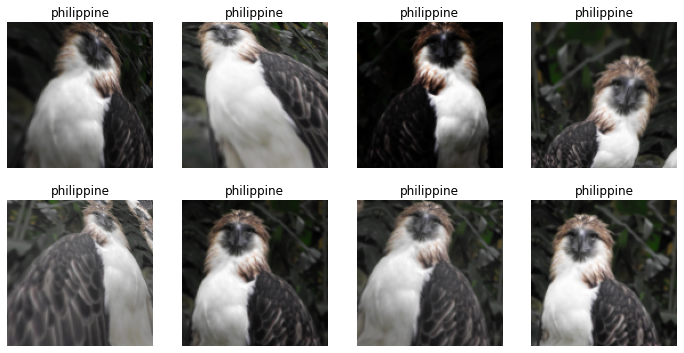

In [ ]:
eagles = eagles.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = eagles.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.542631,0.962434,0.264368,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.701174,0.173779,0.080460,00:22
1,0.513588,0.106175,0.022989,00:22
2,0.442104,0.101874,0.022989,00:22
3,0.390539,0.094246,0.022989,00:22


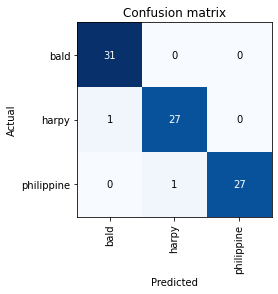

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

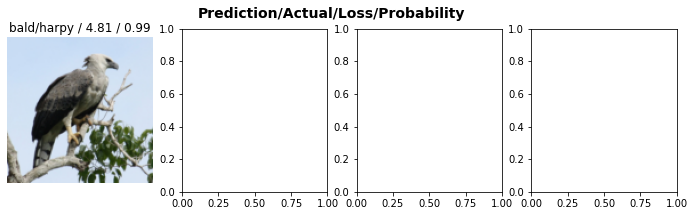

In [ ]:
interp.plot_top_losses(4, nrows=1)